<h1>Исследование интернет-магазина <span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span><ul class="toc-item"><li><span><a href="#Самые-популярные-платформы" data-toc-modified-id="Самые-популярные-платформы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Самые популярные платформы</a></span></li><li><span><a href="#Самые-популярные-жанры" data-toc-modified-id="Самые-популярные-жанры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Самые популярные жанры</a></span></li><li><span><a href="#Влияет-ли-рейтинг-ESRB-на-продажи-в-отдельном-регионе?" data-toc-modified-id="Влияет-ли-рейтинг-ESRB-на-продажи-в-отдельном-регионе?-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Влияет ли рейтинг ESRB на продажи в отдельном регионе?</a></span></li></ul></li><li><span><a href="#Поверка-гипотез" data-toc-modified-id="Поверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Поверка гипотез</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

**Введение**

Для иcследования получены данные из интернет-магазина «Стримчик» – архив исторических данных о продаже игр, оценок пользователей и экспертов, жанров и платформ.

**Цель исследования**

Выявить определяющие успешность игры закономерности.

**Ход исследования**

Данные для исследования получены из файла `games.csv`. О качестве данных ничего не известно, поэтому перед исследованием понадобится тщательная предобработка.

**Этапы исследования**

1. Обзор данных. 

2. Подготовка данных.

3. Исследовательский анализ данных.

4. Портрет пользователя каждого региона.

5. Проверка гипотез.

6. Общий вывод.

## Обзор данных

Подключим необходимые библиотеки.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np 

Выгрузим данные файла `games.csv` в переменную `data` и посмотрим общую информацию.

In [2]:
pth1 = '/datasets/games.csv'
pth2 = 'games.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1, sep = ',' )
elif os.path.exists(pth2):
    data = pd.read_csv(pth2, sep = ',' )
else:
    print('Something is wrong')
    
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Общая информацию о полученном датафрейме.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Информация о столбцах.

* `Name` — название игры


* `Platform` — платформа


* `Year_of_Release` — год выпуска


* `Genre` — жанр игры


* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)


* `EU_sales` — продажи в Европе (миллионы проданных копий)


* `JP_sales` — продажи в Японии (миллионы проданных копий)


* `Other_sales` — продажи в других странах (миллионы проданных копий)


* `Critic_Score` — оценка критиков (максимум 100)


* `User_Score` — оценка пользователей (максимум 10)


* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Подготовка данных

###### example 2

**Приведем названия столбцов к нижнему регистру**

In [4]:
data.columns = data.columns.str.lower()

**Обработаем пропуски**

Построим столбчатую диаграмму процентного значения пропусков.

In [5]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
            .set_title('Процент пропусков', fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :)')

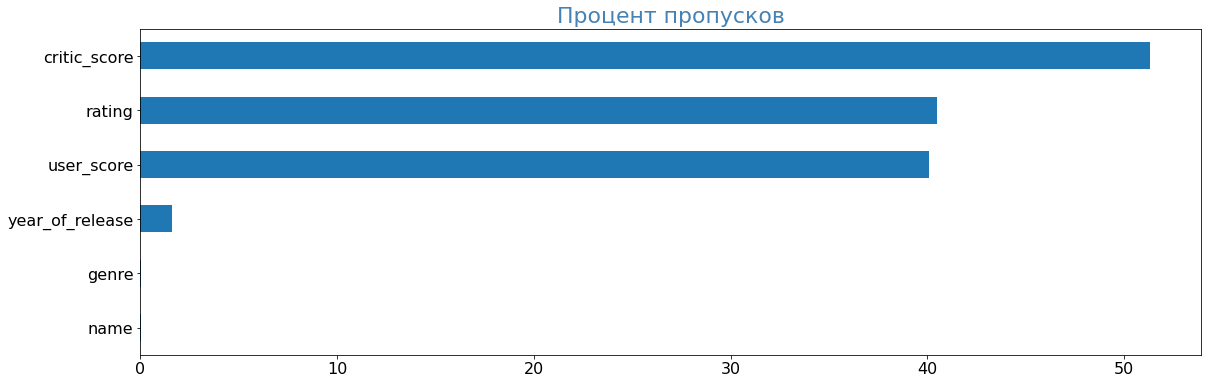

In [6]:
pass_value_barh(data)

Выведем количество пропусков.

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски имеются в столбцах:

*  `name`


* `year_of_release`


* `genre`


* `critic_score`


* `user_score`


* `rating`

**Столбец** – `name`

In [8]:
print(f'Количество пропусков: {data.name.isna().sum()}')

Количество пропусков: 2


Возможные причины пропусков: 

* При подготовке для обработки данных произошла утечка

Так как логической замены нет и количество пропусков незначительно, удалим строки.

In [12]:
data = data.dropna(subset = ['name'])

**Столбец** – `year_of_release`

In [11]:
print(f'Количество пропусков: {data.year_of_release.isna().sum()}')

Количество пропусков: 269


Возможные причины пропусков: 

* При подготовке для обработки данных произошла утечка

* На платформе нет даты релиза

Так как логической замены нет, заполним пропуски заглушками со значением `-1`.

In [12]:
data.loc[data.year_of_release.isna(), 'year_of_release'] = -1

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>☀️Не повлияет ли это не результаты исследования? Может, есть смысл поставить какую-то заглушку типа "unknown"? </div>

<div class="alert alert-info"> Возможно, но как тогда мы поменяем тип на <b>int</b>, при преобразовании?


<div class="alert alert-warning">
<b>Комментарий ревьюера v2.0:</b>☀️Мы просто не поменяем) Здесь необязательно тип данных менять</div>


**Столбец** – `genre`

In [13]:
print(f'Количество пропусков: {data.genre.isna().sum()}')

Количество пропусков: 2


Пропусков больше нет, поэтому идем дальше.

**Столбец** – `critic_score`

In [14]:
print(f'Количество пропусков: {data.critic_score.isna().sum()}')

Количество пропусков: 8578


Возможные причины пропусков: 

* При подготовке для обработки данных произошла утечка

* Игра не оценивалась критиками

* На платформе не указаны оценки критиков

Так как логической замены нет, заполним пропуски заглушками со значением `-1`.

In [15]:
data.loc[data.critic_score.isna(), 'critic_score'] = -1

**Столбец** – `user_score`

In [16]:
print(f'Количество пропусков: {data.user_score.isna().sum()}')

Количество пропусков: 6701


Возможные причины пропусков: 

* При подготовке для обработки данных произошла утечка

* У игры нет оценки от пользователей

* На платформе не указаны оценки пользователей

Так как логической замены нет, заполним пропуски заглушками со значением `-1`. В столбце встречаются данные с значением `tbd`, поэтому заменем их на `NaN`.

In [17]:
data.loc[data.user_score == 'tbd', 'user_score'] = np.nan

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Верное решение!</div>

In [18]:
data.loc[data.user_score.isna(), 'user_score'] = -1

**Столбец** – `rating`

In [19]:
print(f'Количество пропусков: {data.rating.isna().sum()}')

Количество пропусков: 6766


Возможные причины пропусков: 

* При подготовке для обработки данных произошла утечка

* Возрастное ограничение не указано на платфоме 

Так как логической замены нет, присвоим пропущенным значениям значение `неизвестно`.

In [20]:
data.loc[data.rating.isna(), 'rating'] = 'неизвестно'

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Вот здесь хорошая заглушка</div>

Проверим, остались ли пропуски.

In [21]:
data.isna().sum()

name               2
platform           0
year_of_release    0
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Пропусков больше нет!

**Преобразуем данные в нужные типы**

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  object 
 10  rating           16715 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Необходимо изменить тип данных в столбцах:

* `year_of_release` – год реализации должен быть типа `int`


* `critic_score` – оценка критиков должна быть типа `int`


* `user_score` – оценка пользователей должна быть типа `float`

In [23]:
data.year_of_release = data.year_of_release.astype('int')
data.critic_score = data.critic_score.astype('int')
data.user_score = data.user_score.astype('float')

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец `total_sale`. 

In [24]:
data['total_sale'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️Можно еще использовать 
    
    
    games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
    
</div>

<div class="alert alert-info"> Точно! Так выглядит удобнее)

## Исследовательский анализ данных

###### example 3

**Посмотрим сколько игр выпускалось в разные годы**

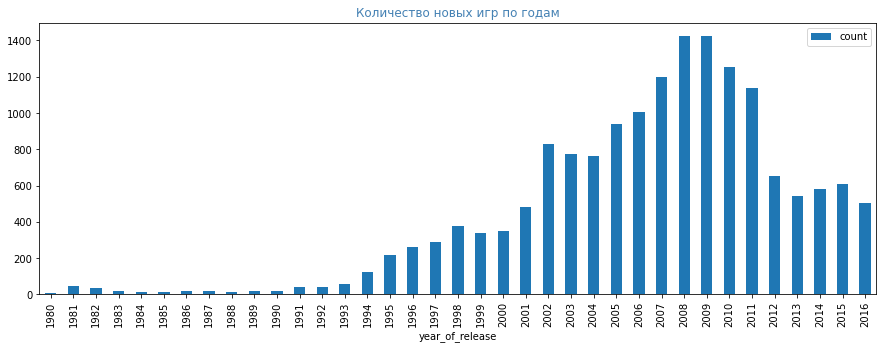

In [25]:
(
    
data.loc[data.year_of_release != -1].pivot_table(index = 'year_of_release',
                                                 values = 'name', 
                                                 aggfunc = 'count')
                                    .rename(columns = {'name':'count'})
                                    .plot(kind = 'bar', figsize = (15,5)).set_title('Количество новых игр по годам', 
                                                                   fontsize = 12, 
                                                                   color = 'SteelBlue')
    
);

Данные за весь доступный период нам не понадобятся, так как для прогноза актуальны данные за последние `5` лет.

**Посмотрим, как менялись продажи по платформам**

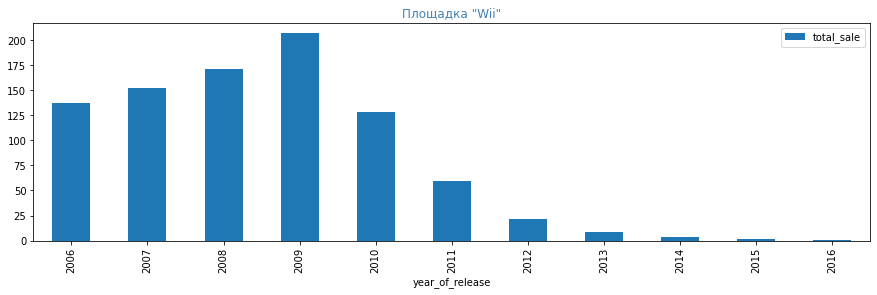

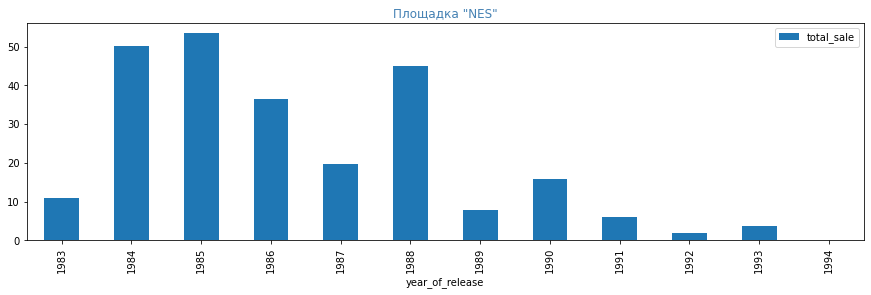

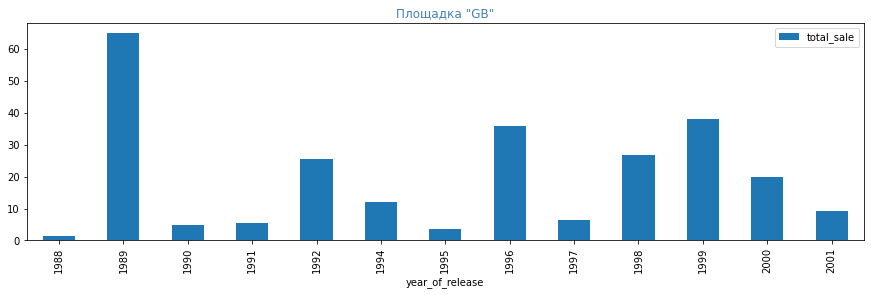

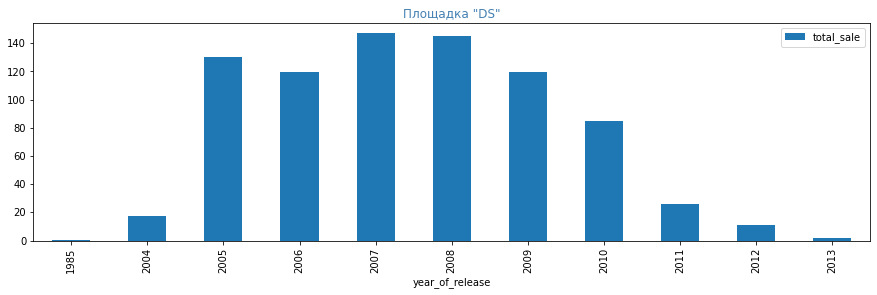

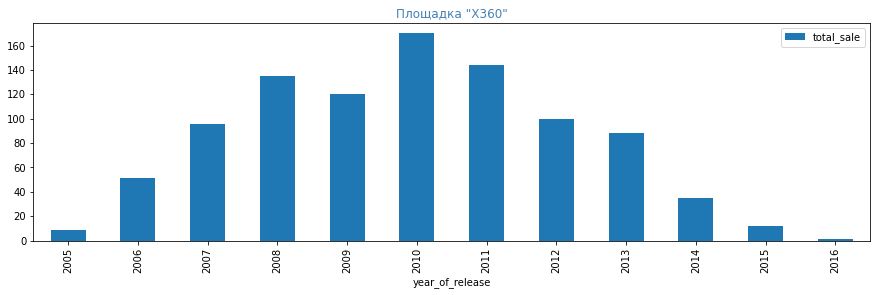

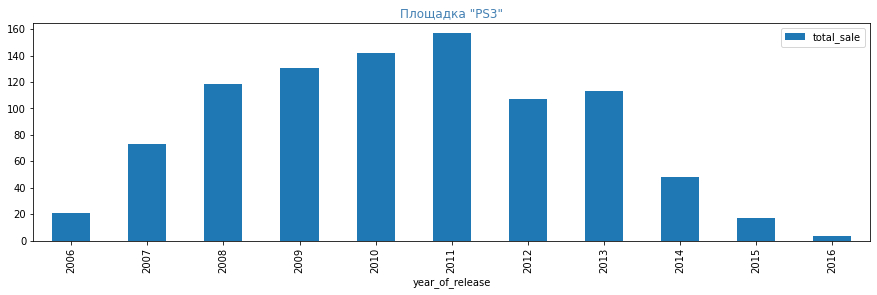

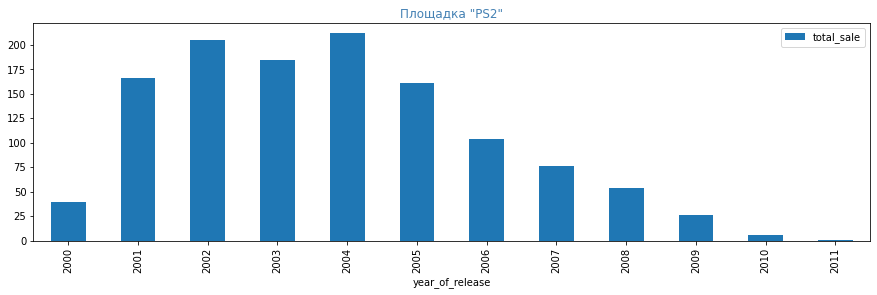

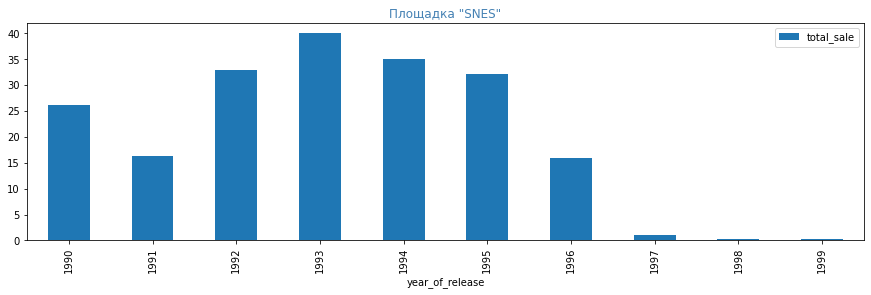

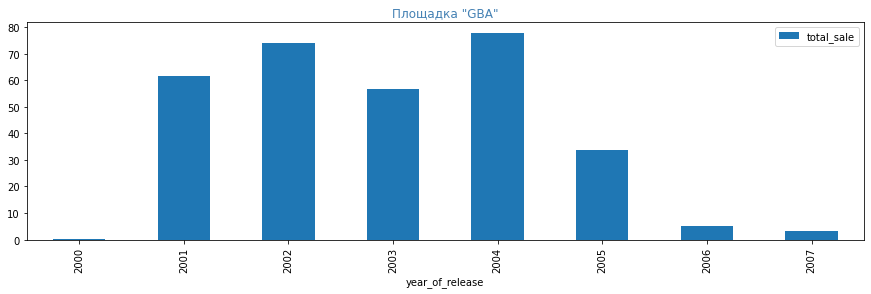

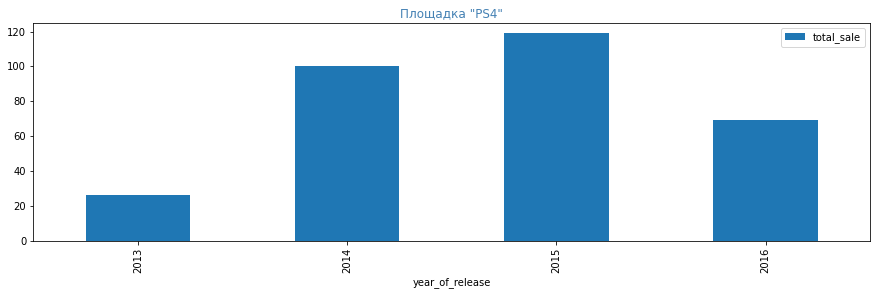

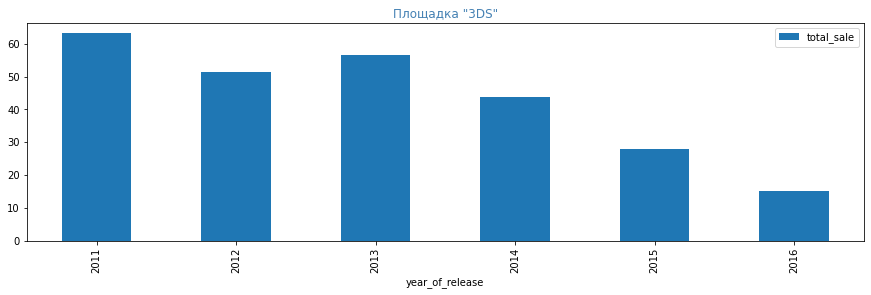

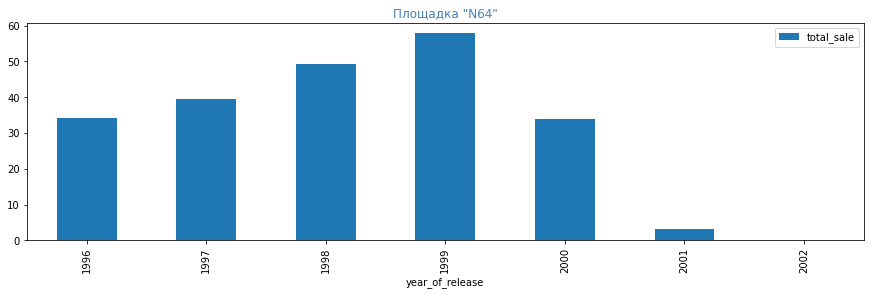

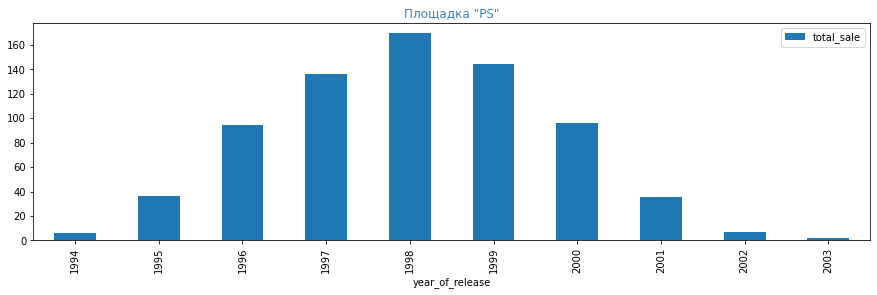

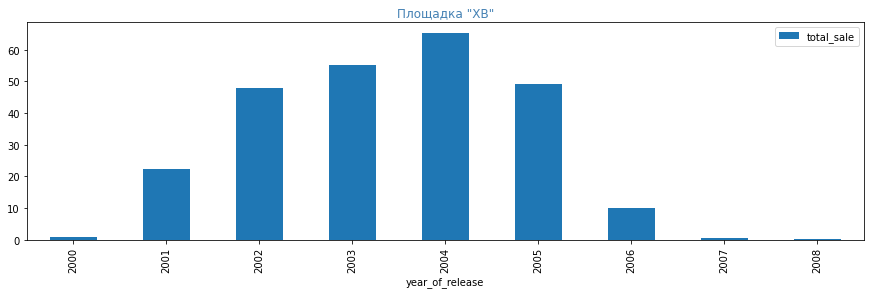

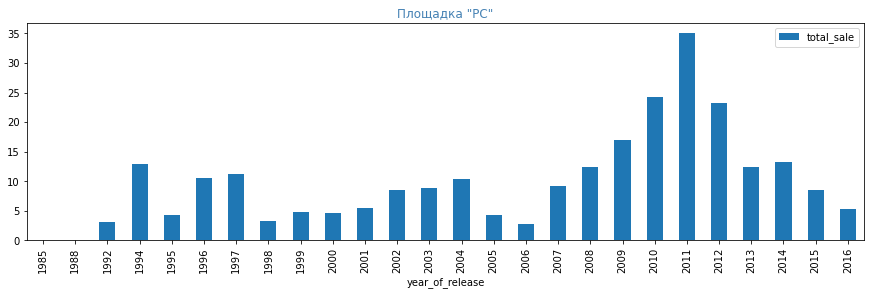

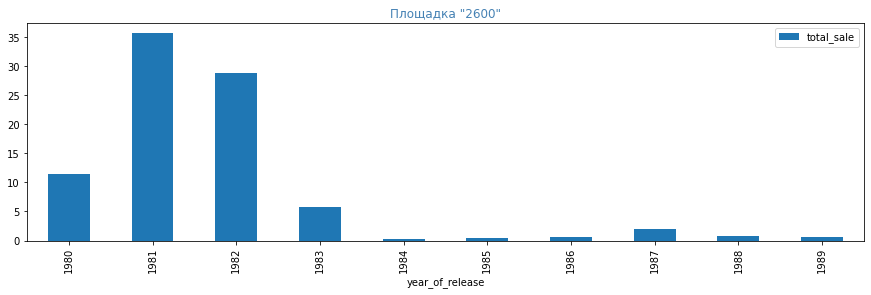

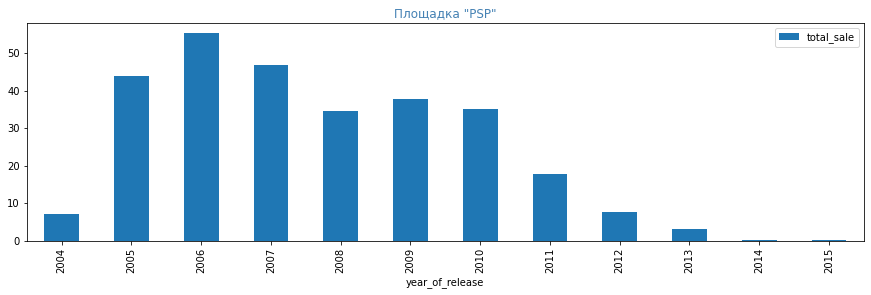

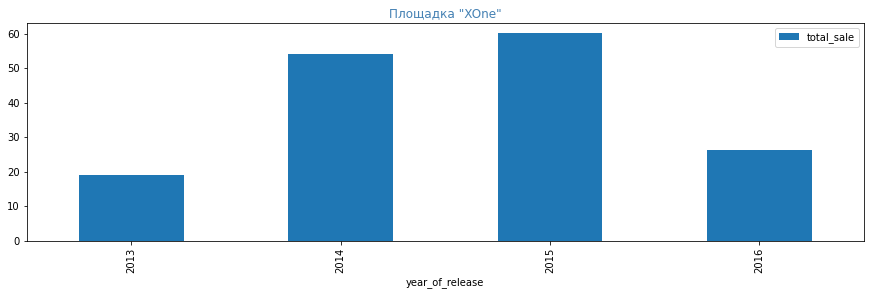

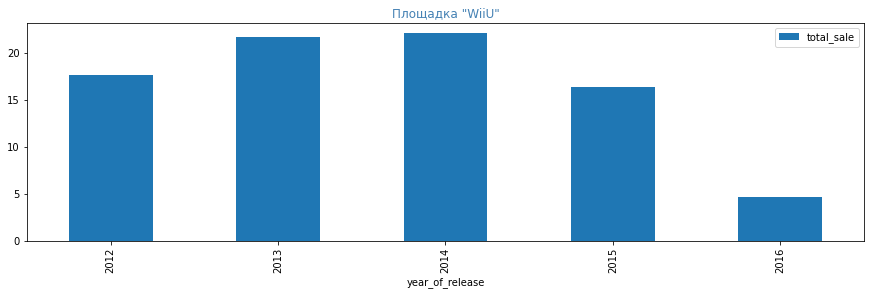

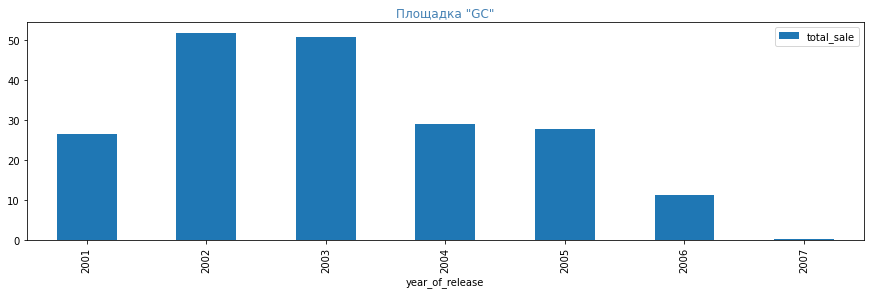

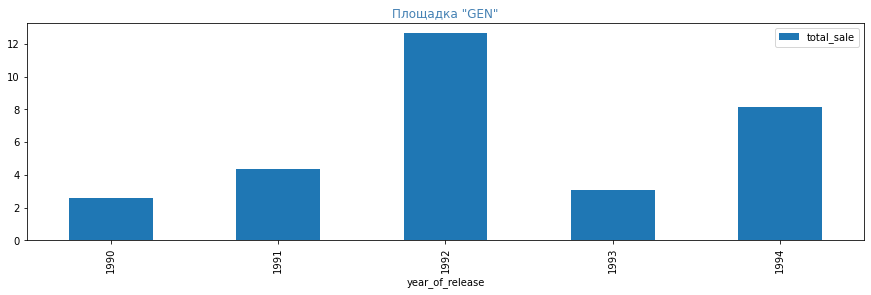

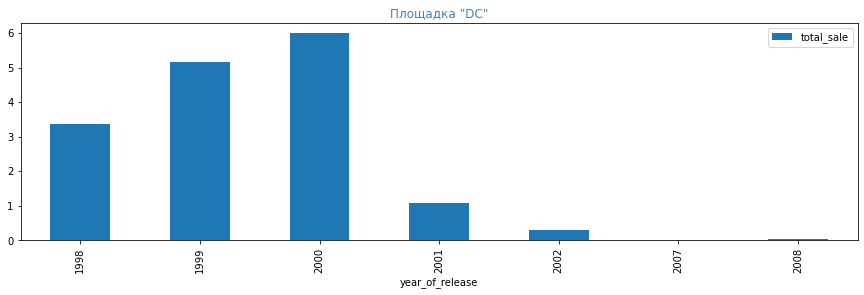

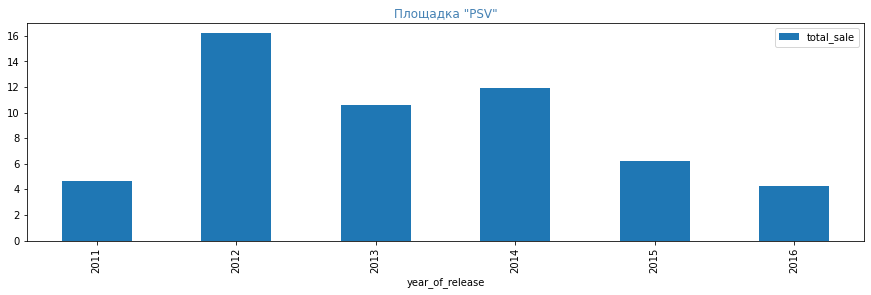

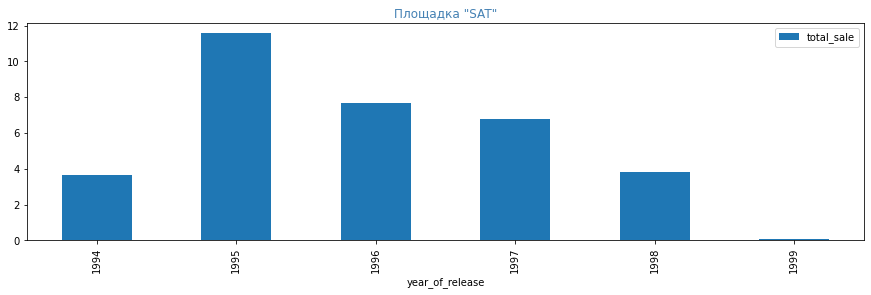

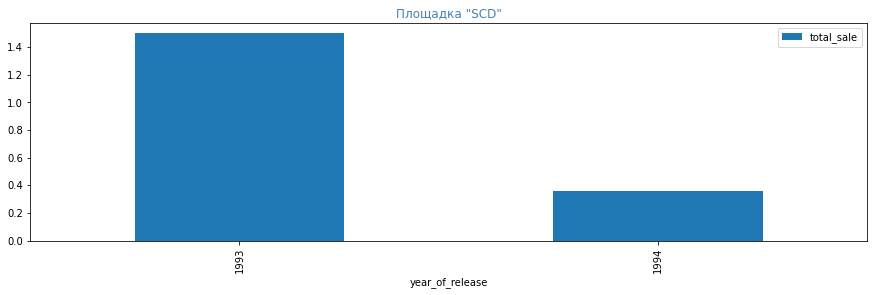

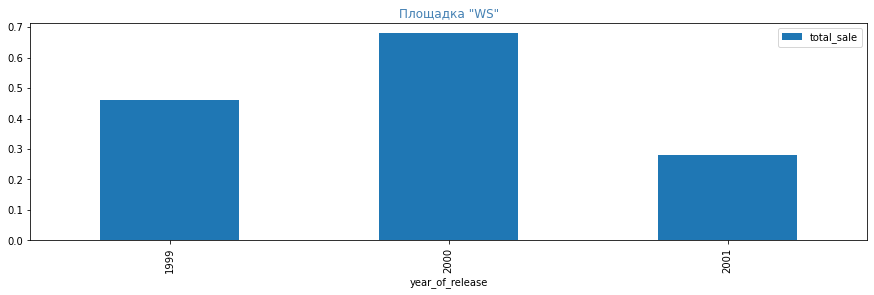

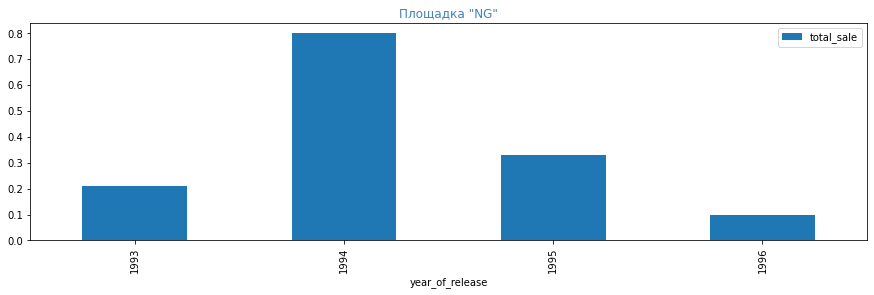

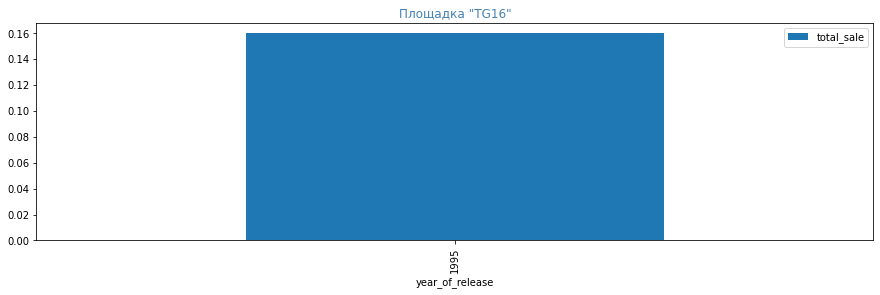

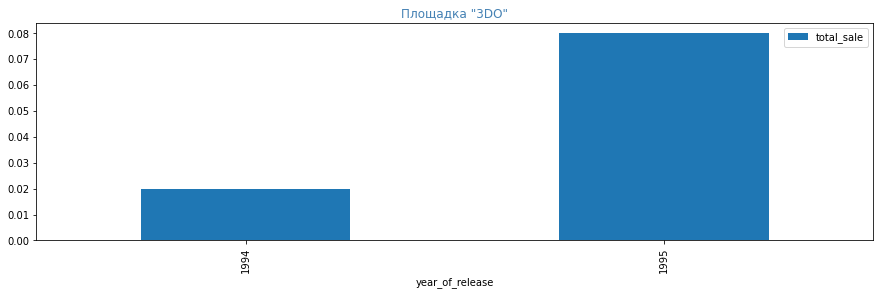

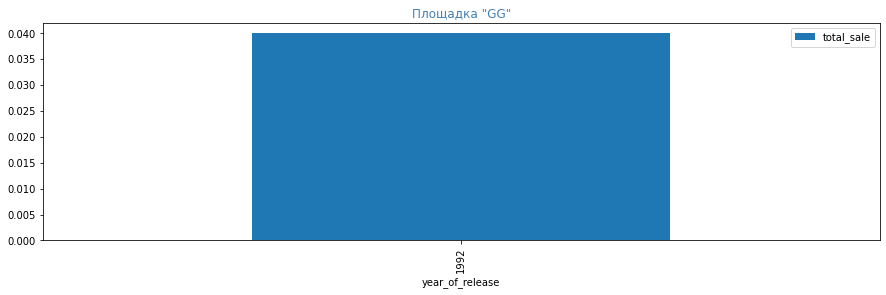

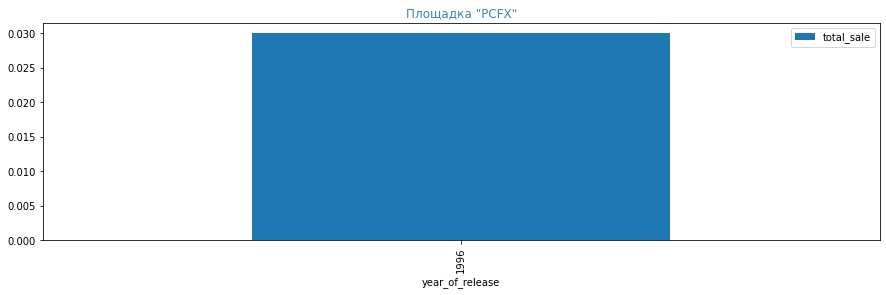

In [26]:
for platform in data.platform.unique():
    data.loc[(data.year_of_release != -1) & (data.platform == platform)]\
        .pivot_table(index = 'year_of_release', values = 'total_sale', aggfunc = 'sum')\
        .plot(kind = 'bar', figsize = (15, 4))
    plt.title(f'Площадка "{platform}"', color = 'SteelBlue')
    plt.show()    

**Выберем платформы с наибольшими суммарными продажами и построим распределение по годам**

Теперь сгруппируем по платформам и найдем сумму, сохранив в переменную – `top_platform`

In [27]:
top_platform = data.pivot_table(index = 'platform', 
                                values = 'total_sale', 
                                aggfunc = 'sum')\
                    .sort_values(by = ['total_sale'], ascending = False)

top_platform

,total_sale
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Выберем топ-5 самых популярных платформ.

In [28]:
top_platform = top_platform[0:5]
top_platform

,total_sale
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


Построим распределение лучших платформ по годам.

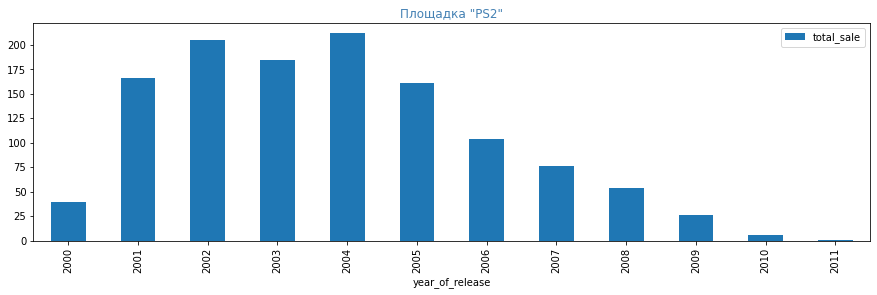

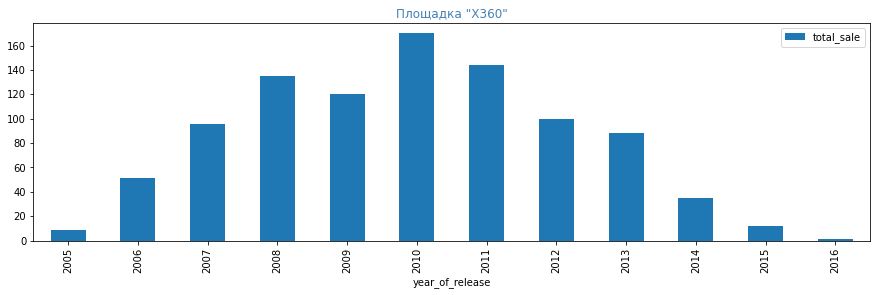

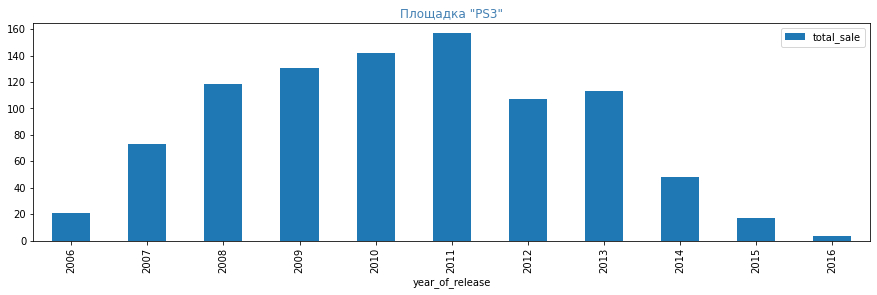

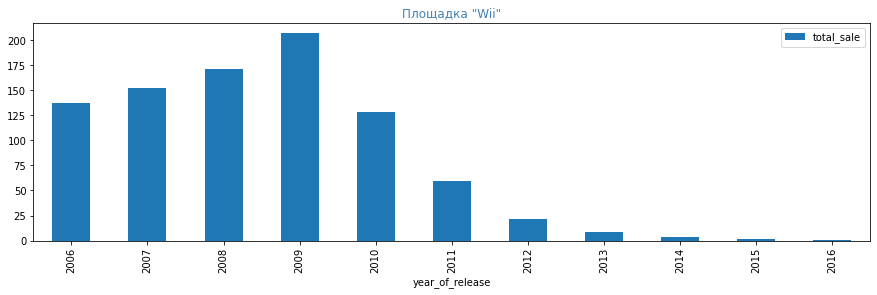

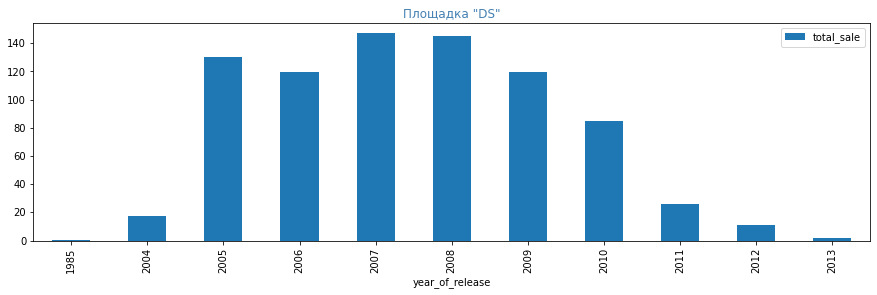

In [29]:
for platform in top_platform.index:
    data.loc[(data.year_of_release != -1) & (data.platform == platform)]\
        .pivot_table(index = 'year_of_release', values = 'total_sale', aggfunc = 'sum')\
        .plot(kind = 'bar', figsize = (15, 4))
    plt.title(f'Площадка "{platform}"', color = 'SteelBlue')
    plt.show()

**За какой характерный срок появляются новые и исчезают старые платформы?** 

Из графиков видно, что компании обычо набирают популярность за `1` год, а исчезают в среднем от `1` до `4` лет.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>⛅️Полностью с тобой согласна
</div>

**Определим актуальный период**

Для прогнозирования на будущее будут актуальны компании, которые существовали и существуют последние `5` лет. 

In [55]:
data_main = data.query("year_of_release >= 2012")

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Но и слишком короткий период тоже брать не стоит.
</div>

**Какие платформы лидируют по продажам?**

Найдем платформы, которые лидируют за последние `5` лет по породажам.

In [56]:
top_platform = data_main.pivot_table(index = 'platform', 
                                values = 'total_sale', 
                                aggfunc = 'sum')\
                    .sort_values(by = 'total_sale', ascending = False)

top_platform

,total_sale
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Выберем топ-5 платформ.

In [57]:
top_platform = top_platform[0:5]

Построим график распределения по годам.

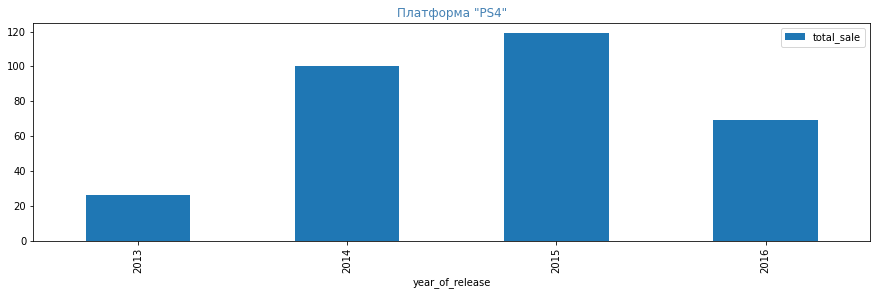

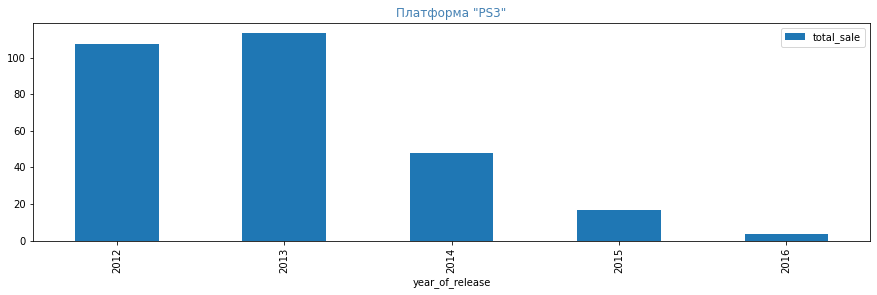

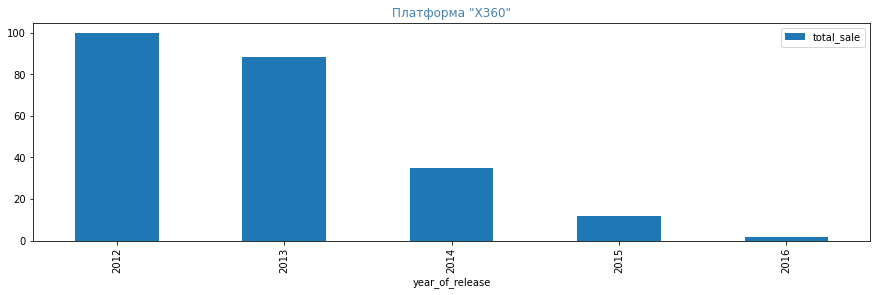

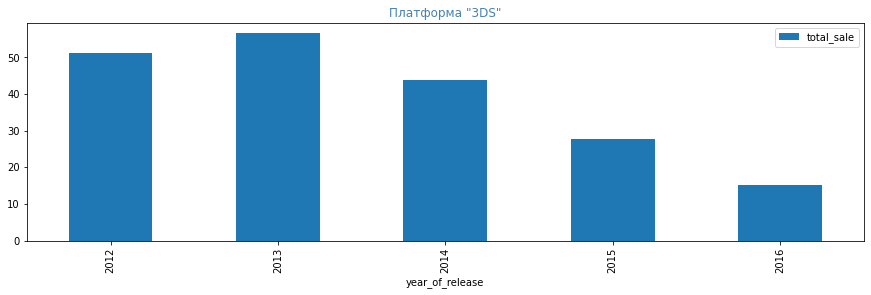

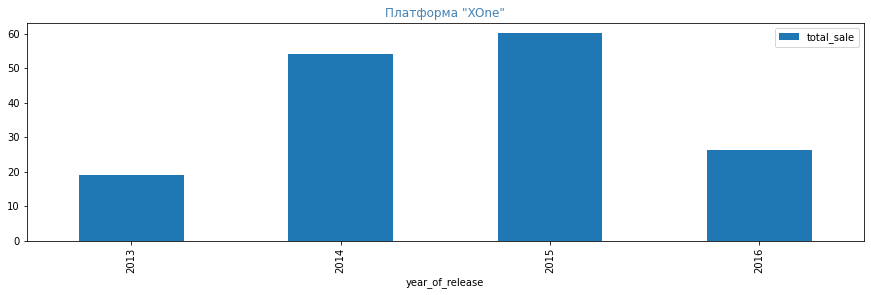

In [58]:
for platform in top_platform.index:
    data_main.loc[data_main.platform == platform]\
        .pivot_table(index = 'year_of_release', values = 'total_sale', aggfunc = 'sum')\
        .plot(kind = 'bar', figsize = (15, 4))
    plt.title(f'Платформа "{platform}"', color = 'SteelBlue')
    plt.show()

* По продажам лидируют платформы: `PS4` , `PS3` , `X360`


* Растут платформы: `PS4` , `XOne`


* Падают платформы: `PS3` , `X360` , `3DS`

Следовательно, потенциально прибыльные платфомы - `PS4`, `XOne`

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Трудно не согласиться с тобой)
</div>

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам**

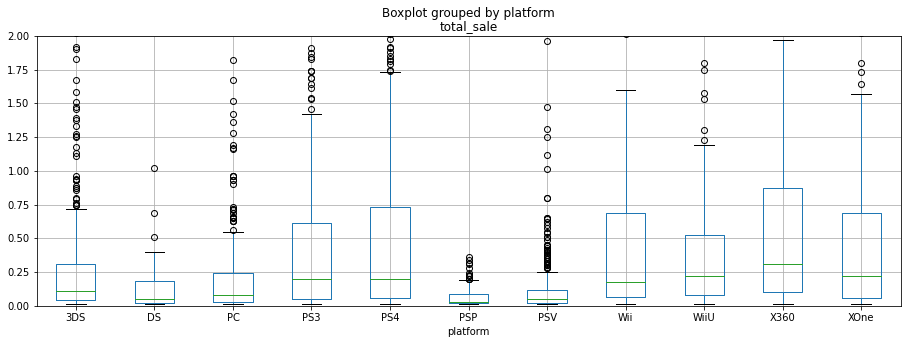

In [59]:
data_main.boxplot(column='total_sale', by='platform', figsize = (15, 5)).set(ylim = (0 ,2));

Из графика видно, что медиана всех платформ находится в промежутке от `0` до `0.25`, а вот размах может сильно отличаться, например: <div>`PS4` и `PSP`

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков**

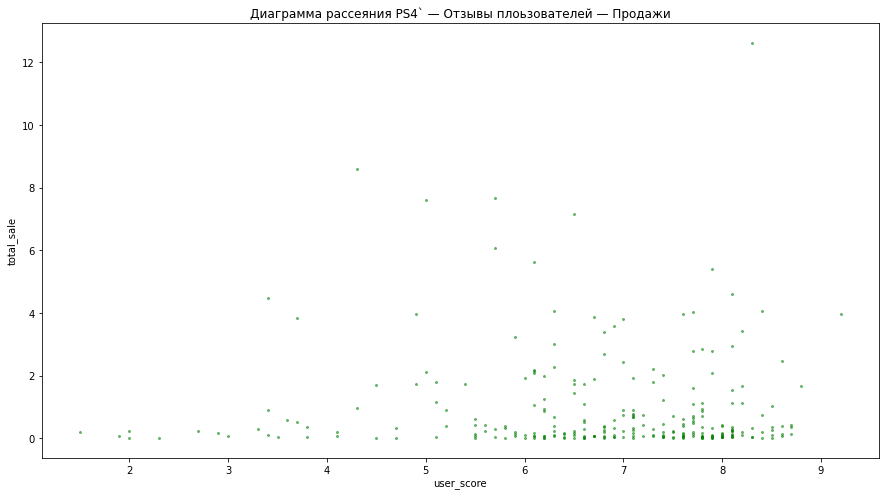

Коррелция: -0.031957110204556376


In [60]:
data_main.query("platform == 'PS4' and user_score != -1").plot(kind='scatter',
        y='total_sale' , x='user_score', alpha=0.5, subplots=True, figsize=(15,8), c = 'g', s = 4)
plt.title('Диаграмма рассеяния PS4` — Отзывы плоьзователей — Продажи');
plt.show()

corr = data_main.query("platform == 'PS4' and user_score != -1")['user_score']\
.corr(data_main.query("platform == 'PS4' and user_score != -1")['total_sale'])

print(f'Коррелция: {corr}')

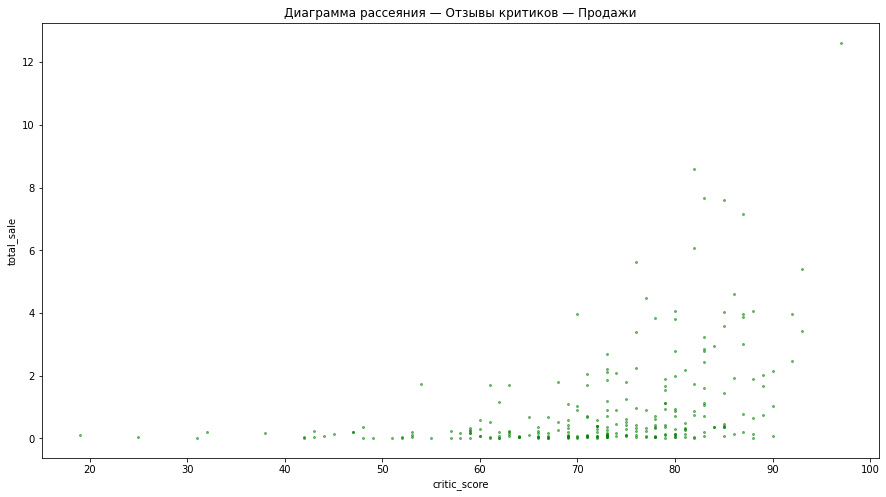

Корреляция: 0.40656790206178095


In [61]:
data_main.query("platform == 'PS4' and critic_score != -1").plot(kind='scatter',
        y='total_sale' , x='critic_score', alpha=0.5, subplots=True, figsize=(15,8), c = 'g', s = 4)
plt.title('Диаграмма рассеяния — Отзывы критиков — Продажи');
plt.show()

corr = data_main.query("platform == 'PS4' and critic_score != -1")['critic_score']\
.corr(data_main.query("platform == 'PS4' and critic_score != -1")['total_sale'])
print(f'Корреляция: {corr}')

Из граффиков видно, что отзывы критиков сильнее влияют на общие продажи, чем отзывы пользователей, так как пользователи дают сугубо личную оценку, а критики общую. Это также подтверждается значениями корреляции. 

**Соотнесем выводы с продажами игр на других платформах**

Поостроим графики и найдем корреляцию для отношения: `отзывы пользователей / продажи`

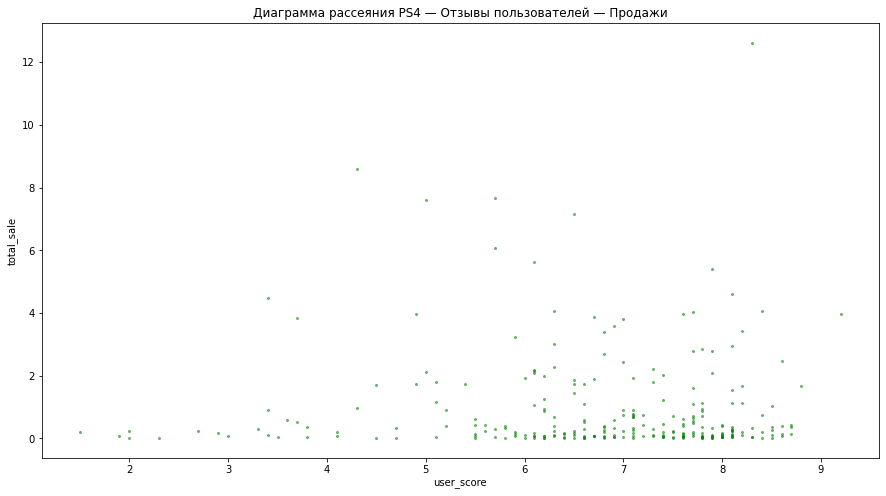

Коррелция: -0.031957110204556376


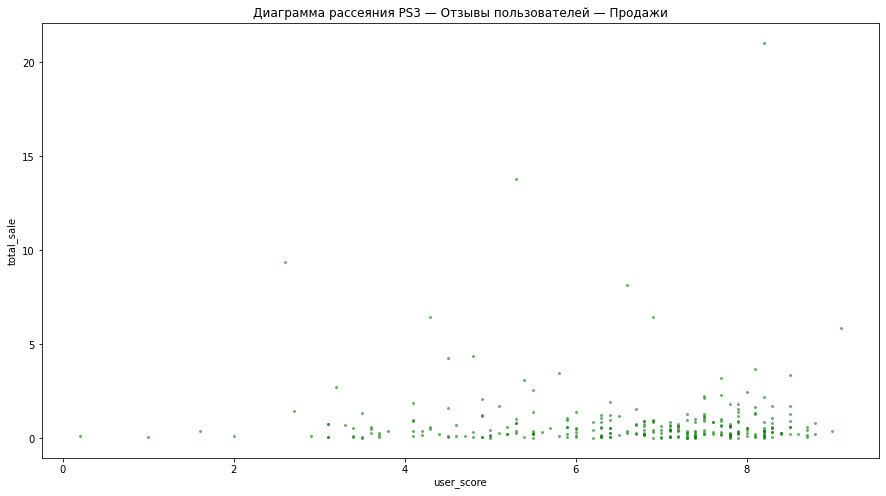

Коррелция: -0.005143522887113828


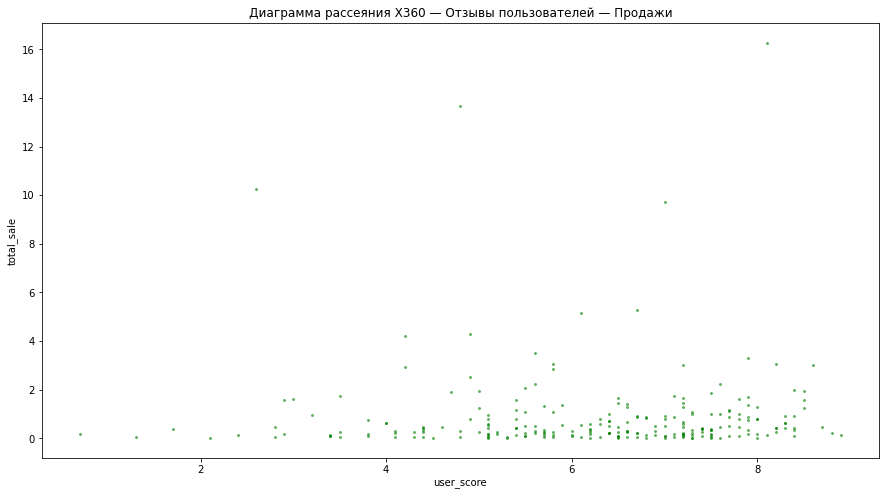

Коррелция: 0.006163978646213326


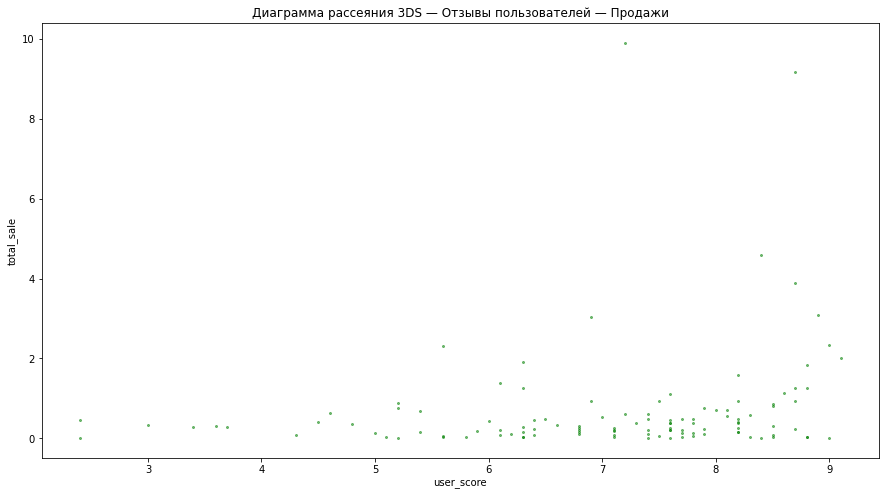

Коррелция: 0.19758263411038599


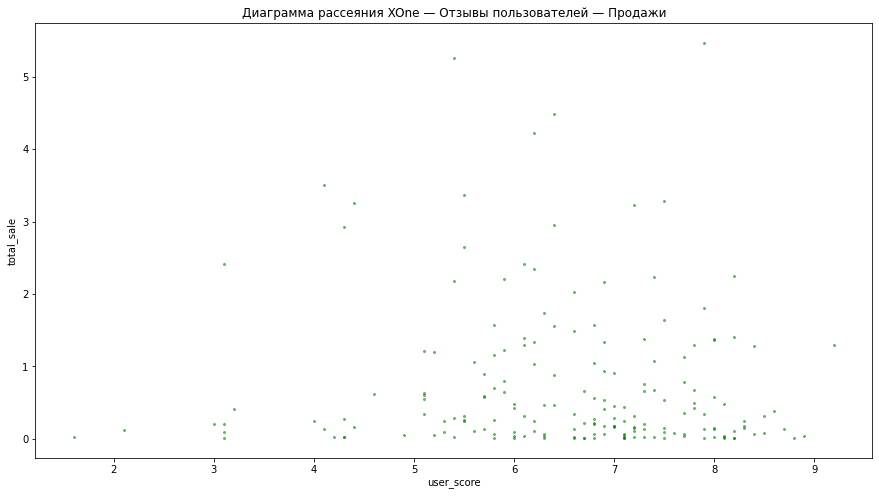

Коррелция: -0.06892505328279414


In [62]:
for platform in top_platform.index:
    data_main.query("platform == @platform and user_score != -1").plot(kind='scatter',
        y='total_sale' , x='user_score', alpha=0.5, subplots=True, figsize=(15,8), c = 'g', s = 4)
    plt.title(f'Диаграмма рассеяния {platform} — Отзывы пользователей — Продажи');
    plt.show()

    corr = data_main.query("platform == @platform and user_score != -1")['user_score']\
    .corr(data_main.query("platform == @platform and user_score != -1")['total_sale'])

    print(f'Коррелция: {corr}')

Поостроим графики и найдем корреляцию для отношения: `отзывы критиков / продажи`

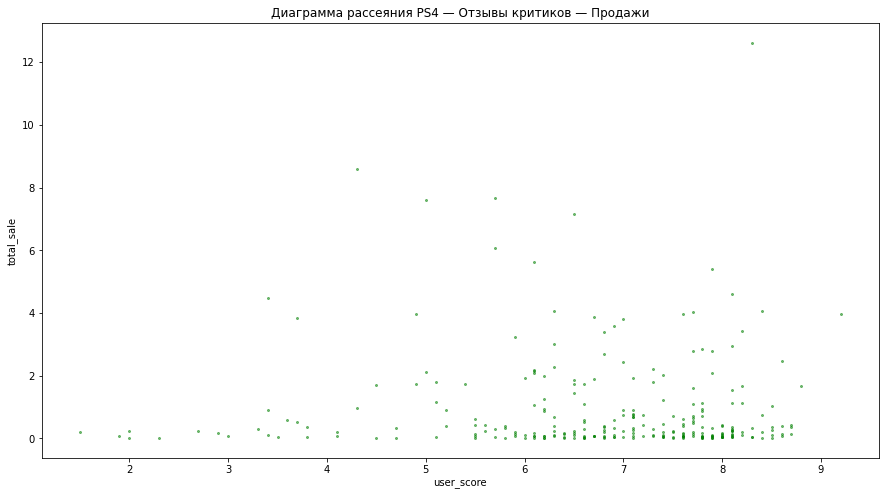

Коррелция: 0.3504074587850579


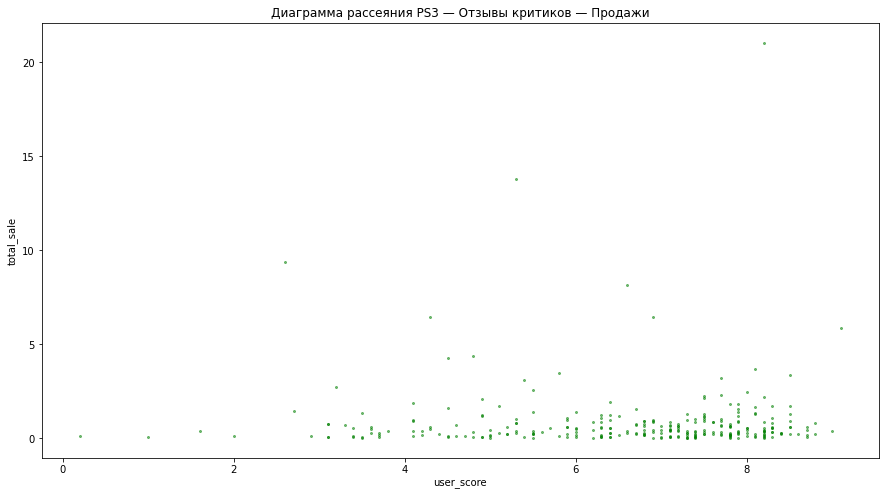

Коррелция: 0.20126038044478803


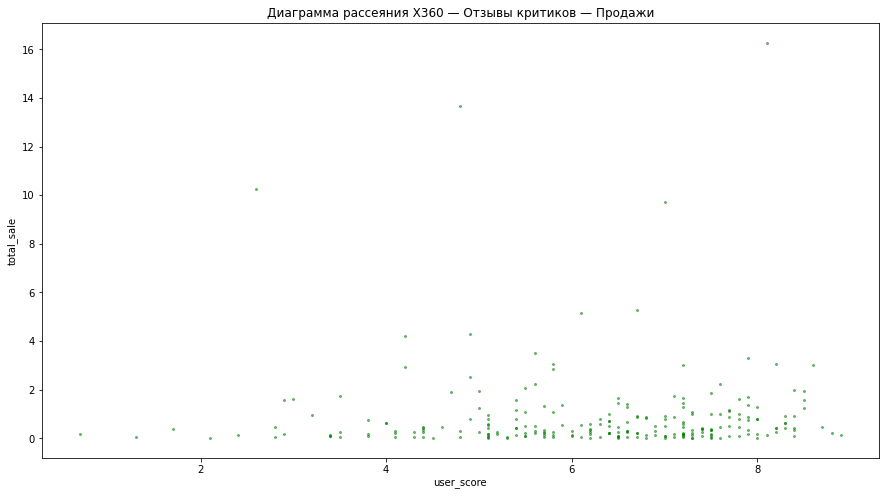

Коррелция: 0.2545770149075233


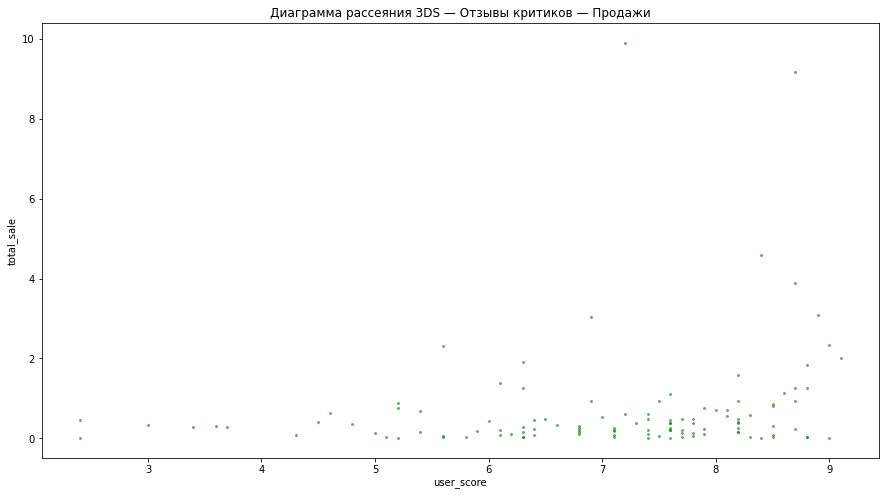

Коррелция: 0.24978955701633748


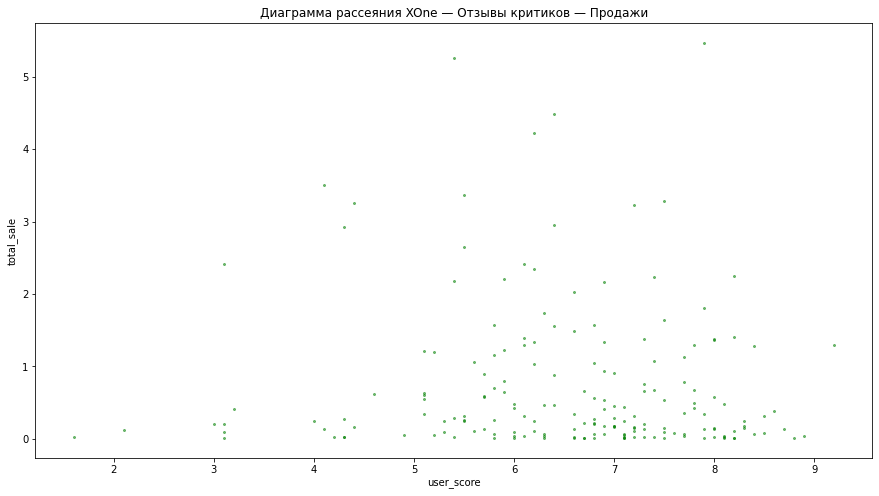

Коррелция: 0.3335794430098834


In [63]:
for platform in top_platform.index:
    data_main.query("platform == @platform and user_score != -1").plot(kind='scatter',
        y='total_sale' , x='user_score', alpha=0.5, subplots=True, figsize=(15,8), c = 'g', s = 4)
    plt.title(f'Диаграмма рассеяния {platform} — Отзывы критиков — Продажи');
    plt.show()

    corr = data_main.query("platform == @platform and user_score != -1")['critic_score']\
    .corr(data_main.query("platform == @platform and user_score != -1")['total_sale'])

    print(f'Коррелция: {corr}')

**Вывод:** 
    
Видно, что и для других платформ отзывы критиков на продажи влияют сильнее, но стоит учитывать, что уровень корреляции: <div>
`слабо-положительный`
    

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️Стоит сказать, что коэффициент корреляции не такой уж и высокий
</div>

<div class="alert alert-info"> И правда, уточню!

**Определим самые прибыльные жанры**

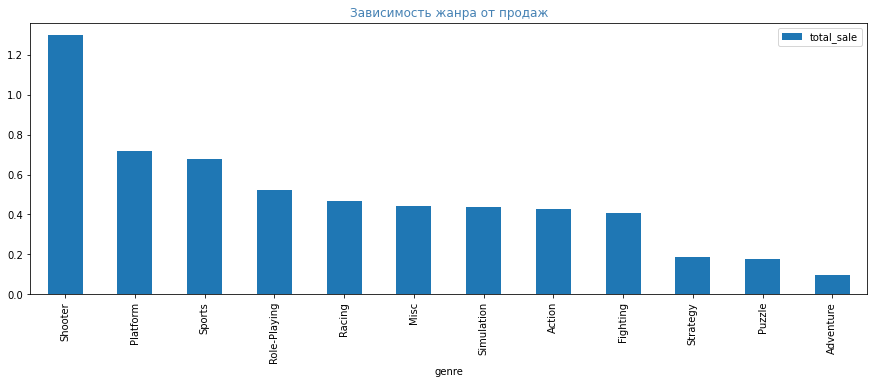

In [64]:
data_main.pivot_table(index = 'genre', 
                      values = 'total_sale') \
.sort_values(by = 'total_sale', ascending = False).plot.bar(figsize = (15,5));

plt.title('Зависимость жанра от продаж', color = 'SteelBlue')
plt.show()

Из графика видно, что:

* Самые прибыльные жанры - `Shouter`, `Platform`, `Role-Playing`, `Sports`

* Жанры с высокими и низкими продажами сильно отличаются, например: `Shpouter` и `Adventure`
    

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>⛅️Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть средние или медианные продажи.
</div>

<div class="alert alert-info"> И правда, не учел, исправлю!


<div class="alert alert-success">
<b>Комментарий ревьюера v2.0:</b>☀️Спасибо за корректировки!</div>


## Портрет пользователя каждого региона

###### example 4

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы

**Регион NA**

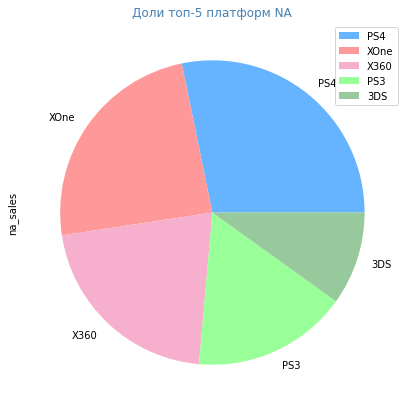

In [65]:
data.loc[data.year_of_release >= 2013].pivot_table(index = 'platform', 
                 values = 'na_sales', 
                 aggfunc = 'sum')\
.sort_values(by = 'na_sales', ascending = False)[0:5]\
.plot.pie(subplots=True, colors = ['#66b3ff','#ff9999','#f6afcd','#99ff99', '#98c99c'], figsize = (7, 7));

plt.title('Доли топ-5 платформ NA' , color = 'SteelBlue');

**Регион EU**

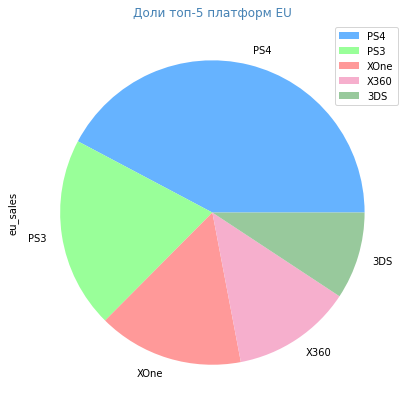

In [66]:
data.loc[data.year_of_release >= 2013].pivot_table(index = 'platform', 
                 values = 'eu_sales', 
                 aggfunc = 'sum')\
.sort_values(by = 'eu_sales', ascending = False)[0:5]\
.plot.pie(subplots=True, colors = ['#66b3ff','#99ff99','#ff9999','#f6afcd', '#98c99c'], figsize = (7, 7));

plt.title('Доли топ-5 платформ EU' , color = 'SteelBlue');

**Регион JP**

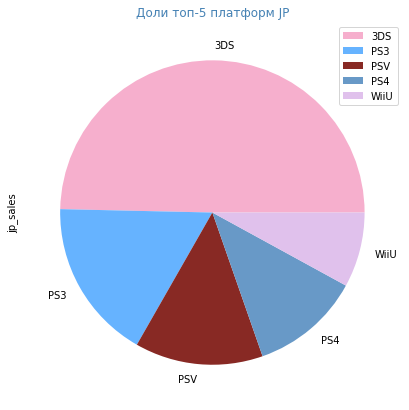

In [67]:
data.loc[data.year_of_release >= 2013].pivot_table(index = 'platform', 
                 values = 'jp_sales', 
                 aggfunc = 'sum')\
.sort_values(by = 'jp_sales', ascending = False)[0:5]\
.plot.pie(subplots=True, colors = ['#f6afcd','#66b3ff','#882924','#6899c7', '#e0c1ec'], figsize = (7, 7));

plt.title('Доли топ-5 платформ JP' , color = 'SteelBlue');

**Вывод**:

Платформы, занимающие основную часть:
* NA - `PS4` , `XOne` , `X360`, `PS3`


* EU - `PS4` , `XOne` , `X360`, `PS3`


* JP - `3DS` и `PS3`

Общие предпочтения:

Во всех регионах сильно выделяется платформа - `PS3`.

В регионах `NA` и `EU` схожи предпочтения: `X360` , `PS3` , `PS4` , `XOne`.


Индивидуальные предпочтения:

Предпочтения `NA` и `EU` отличаются не так сильно, а вот в `JP` платфома `3DS` занимает большую часть, в отличии от других регионов.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>⛅️Да, все точно так! Отлично, что ты строишь диаграммы, наглядно можно заметить какие-то особенности, которые не так заметны "по цифрам"
</div>

### Самые популярные жанры

In [68]:
for paltform in ['eu_sales', 'na_sales', 'jp_sales']:
    display(data.loc[data.year_of_release >= 2013]\
    .pivot_table(index = ['genre'], values = paltform, aggfunc = 'sum')\
    .sort_values(by = paltform, ascending = False)[:5])

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


**Вывод:** 

Лучшие жанры:

* EU - `Action`


* NA - `Action`


* JP - `Role-Playing`

Общие предпочтения:

В регионах `NA` и `EU` схожи предпочтения: `Action` , `Shooter` , `Sports` , `Role-Playing`. Везде преобладает жанр `Action`, однако в Японии также распространены жанры `Role-Playing` , `Misc` и `Fighting`, так как Япония - это страна-основатель жанра `Аниме`.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

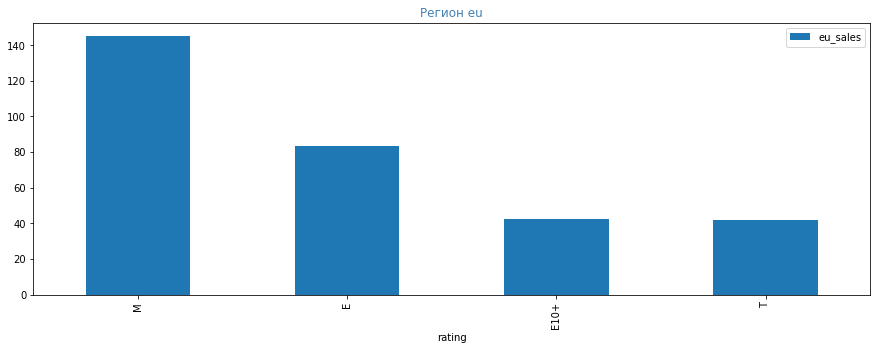

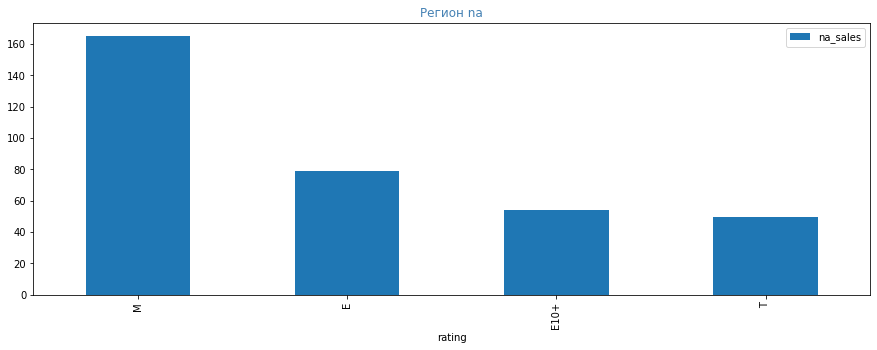

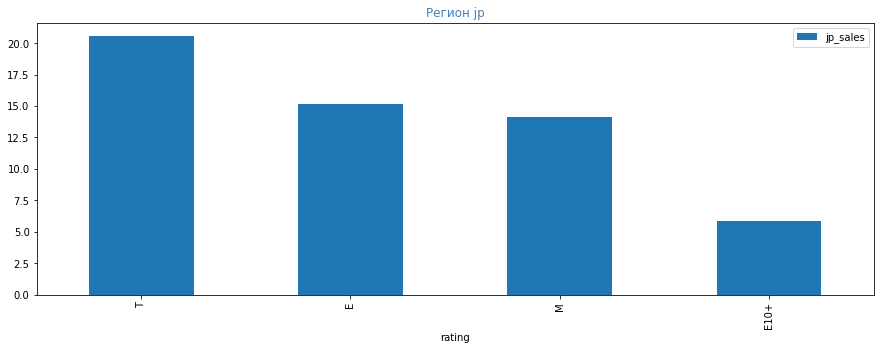

In [69]:
for platform in ['eu_sales', 'na_sales', 'jp_sales']:
    data.loc[(data.year_of_release >= 2013) & (data.rating != 'неизвестно')].pivot_table(index = 'rating', 
                                                   values = platform, 
                                                   aggfunc = 'sum')\
    .sort_values(by = platform, ascending = False).plot.bar(figsize = (15, 5))
    plt.title(f'Регион {platform[0:2]}', color = 'SteelBlue')


**Вывод:** 


    

* Регион `EU` - видно, что больше всего продаж имеют игры с возрастным ограничением `M`, а это озночает, что преобладают пользователи предпочитающие игры `17+`.  


* Регион `NA` - поностью повторяет регион `EU`. 


* Регион `JP` - видно, что больше всего продаж имеют игры с возрастным ограничением `T`, а это озночает, что преобладают пользователи со статусом - подросток.

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️Здесь тоже можно построить графики и визуализировать выводы
</div>

## Поверка гипотез

Гипотезы: 

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?**

H0: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые <div>
H1: cредние пользовательские рейтинги платформ Xbox One и PC разные

Так как у нас проверка гипотезы о равенстве средних двух генеральных совокупностей, то воспользуемся методом <div> `scipy.stats.ttest_ind (array1, array2, equal_var)` 

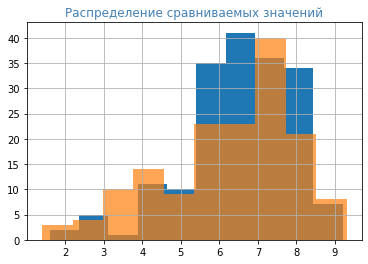

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


In [70]:
alpha = .05 

results = st.ttest_ind(
    data.loc[(data.year_of_release >= 2013) & (data.user_score != -1)].query("platform == 'XOne'")['user_score'], 
    data.loc[(data.year_of_release >= 2013) & (data.user_score != -1)].query("platform == 'PC'")['user_score'])

data.loc[(data.year_of_release >= 2013) & (data.user_score != -1)].query("platform == 'XOne'")['user_score'].hist()
data.loc[(data.year_of_release >= 2013) & (data.user_score != -1)].query("platform == 'PC'")['user_score'].hist(alpha = 0.7)
plt.title('Распределение сравниваемых значений', color = 'SteelBlue')
plt.show()

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Следовательно, мы можем принять нулевую гипотезу: `cредние пользовательские рейтинги платформ Xbox One и PC одинаковые`.

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️Хорошая практика - выводить сами значения сравниваемых параметров
</div>

<div class="alert alert-info"> Вроде правильно понял, график добавил. 

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные?**

H0: средние пользовательские рейтинги жанров Action и Sports одинаковые <div>
H1: средние пользовательские рейтинги жанров Action и Sports разные

Так как у нас проверка гипотезы о равенстве средних двух генеральных совокупностей, то воспользуемся методом <div> `scipy.stats.ttest_ind (array1, array2, equal_var)` 

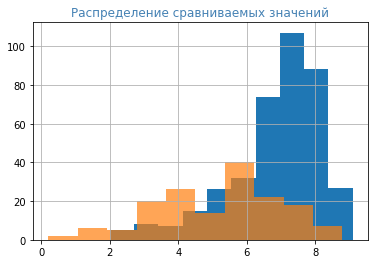

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


In [72]:
alpha = .05

results = st.ttest_ind(
    data.loc[(data.year_of_release >= 2013) & (data.user_score != -1)].query("genre == 'Action'")['user_score'], 
    data.loc[(data.year_of_release >= 2013) & (data.user_score != -1)].query("genre == 'Sports'")['user_score'])

data.loc[(data.year_of_release >= 2013) & (data.user_score != -1)].query("genre == 'Action'")['user_score'].hist()
data.loc[(data.year_of_release >= 2013) & (data.user_score != -1)].query("genre == 'Sports'")['user_score'].hist(alpha = 0.7)
plt.title('Распределение сравниваемых значений', color = 'SteelBlue')
plt.show()

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Следовательно, мы отвергаем нулевую гипотезу и принимаем альтернативную: `средние пользовательские рейтинги жанров Action и Sports разные`.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Все супер! Проверка статистических гипотез в будущем тебе пригодится)
</div>

## Вывод

Подводя итоги, сделаем выводы по каждому пункту:
1. Обзор данных. 

2. Подготовка данных.

3. Исследовательский анализ данных.

4. Портрет пользователя каждого региона.

5. Проверка гипотез.

**Обзор данных**

В работе были ипользованы и обработаны данные о `продаже игр на разных платформах`. О качестве данных инормации не было, поэтому была проведена тщательная предобработка.

**Подготовка данных**

В ходе работы были найдены и исправлены следующие ошибки:
* измененены типы данных 
* обработаны пропущенные значения

**Исследовательский анализ данных** 

В ходе работы были определены:

* платформы с наибольшими суммарными продажами


* топ-5 самых популярных платформ


* срок появления новых и исчезновение старых платформ


* актуальный период 


* влияние отзывов пользователей и критиков на продажи


* самые прибыльные жанры

**Портрет пользователя каждого региона**

Самые популярные платформы по регионам:
* NA - `PS4` , `XOne` , `X360`, `PS3`


* EU - `PS4` , `XOne` , `X360`, `PS3`


* JP - `3DS` и `PS3`

Самые популярные жанры по регионам:

* EU - `Action`


* NA - `Action`


* JP - `Role-Playing`

Влияние рейтинга ESRB на продажи в отдельном регионах:

* Регион `EU` - видно, что больше всего продаж имеют игры с возрастным ограничением `M`, а это озночает, что преобладают пользователи предпочитающие игры `17+`.  


* Регион `NA` - поностью повторяет регион `EU`. 


* Регион `JP` - видно, что больше всего продаж имеют игры с возрастным ограничением `T`, а это озночает, что преобладают пользователи со статусом - подросток (13-17 лет).

**Проверка гипотез**

Были сделаны выводы:

1. cредние пользовательские рейтинги платформ Xbox One и PC одинаковые


2. средние пользовательские рейтинги жанров Action и Sports разные

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Анатолий, спасибо тебе за твой проект! Все отлично, отдельно отмечу чистый код - аж читать приятно. Очень хорошо, что ты делаешь много промежуточных выводов, однако, есть моменты, которые нужно доработать. Подробнее о них ты узнаешь в моих комментариях по ходу проекта. Пожалуйста, ознакомься с ними и оставь свои. Отправляю тебе проект на доработку и жду на повторную проверку, успехов, все получится ! :) С Наступившим Новым годом!
</div>

<div class="alert alert-info"> Спасибо) <div> С Наступившим Новым годом!


<div class="alert alert-success">
<b>Комментарий ревьюера v2.0:</b>☀️Спасибо! Проект принят, поздравляю! Успехов на поприще аналитики :)</div>
